In [ ]:
import numpy as np
from scipy.stats import bernoulli as bern
import matplotlib.pyplot as plt

#Q1 Part A

In [ ]:
def GenerateSample(mu1, mu2):
  sampleClass1 = np.zeros((100,2))
  sampleClass2 = np.zeros((100,2))
  sample1_0 = bern.rvs(mu1[0] , size = 100)
  sample1_1 = bern.rvs(mu1[1] , size = 100)
  sample2_0 = bern.rvs(mu2[0] , size = 100)
  sample2_1 = bern.rvs(mu2[1] , size = 100)
  for i in range(100):
    sampleClass1[i] = np.array([sample1_0[i] , sample1_1[i]])
    sampleClass2[i] = np.array([sample2_0[i] , sample2_1[i]])
  
  return sampleClass1, sampleClass2

In [ ]:
mu1 = [0.5 , 0.8]
mu2 = [0.9 , 0.2]
sampleClass1, sampleClass2 = GenerateSample(mu1,mu2)

In [ ]:
sampleClass1.shape

(100, 2)

#Part B 

In [ ]:
def computeMLE(sample):
  np.random.shuffle(sample)
  train = sample[:50,:]
  test =  sample[50:,:]
  MLE = [train[: ,0].mean() , train[: , 1].mean()]
  return train, test, MLE

In [ ]:
trainClass1 , testClass1, MLE1= computeMLE(sampleClass1)
trainClass2 , testClass2, MLE2= computeMLE(sampleClass2)
print("MLE for class 1:" ,MLE1)
print("MLE for class 2:" ,MLE2)

MLE for class 1: [0.58, 0.9]
MLE for class 2: [0.88, 0.16]


In [ ]:
def plottingMLE(train , c):
  MLE= []
  for i in range(1,51) : 
      temp = train[:i]
      MLE.append(np.array([temp[: , 0].mean() , temp[: , 1].mean()]))
  
  MLE = np.array(MLE)
  x = np.arange(0,50 , 1)
  plt.plot(x , MLE[: , 0])
  plt.plot(x , MLE[: , 1])
  plt.title(f"MLE vs n for Class{c}")
  plt.show()

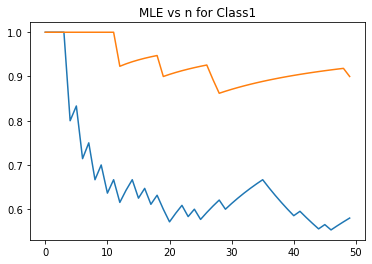

In [ ]:
plottingMLE(trainClass1,1)

#Observation: 
For lower values of N, MLE gives incorrect estimates. However, as the size sample grows, i.e the value of n increases, the estimate of mle comes closer and closer to the real value of mean(p).
For eg. for dimension 1, the value of mle comes close to 0.5 while for dimension 2, the value of mle comes closer to 0.8

#Part C

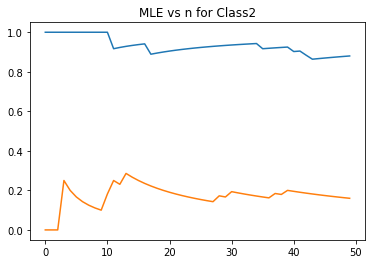

In [ ]:
plottingMLE(trainClass2,2)

#Part D

In [ ]:
def scatterPlot(sample,c):
  # x = np.arange(0.01, 1.01, 0.01)
  plt.scatter(sample[:,0], sample[:,1])
  plt.title(f"scatter plot for Class{c}")
  plt.show()

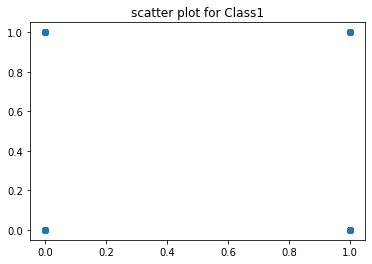

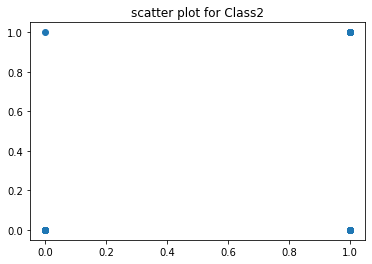

In [ ]:
scatterPlot(sampleClass1,1)
scatterPlot(sampleClass2,2)

#Part E

In [ ]:
# function to return discriminant given a sample x 
def discriminant(mu, sample, prior): 
  likeli = 0 
  for idx, ele in enumerate(sample): 
    likelihood = ele * np.log(mu[idx]) + (1-ele) * np.log(1-mu[idx])
    likeli = likeli + likelihood 
  
  discri = likeli + np.log(prior)
  return discri 


In [ ]:
m1 = MLE1
m2 = MLE2

In [ ]:
# function to count the number of samples correctly classified for a given class 
def count_correct(test_data, class_n, prior): 
  correct1 = 0
  pred = []
  for i in range(len(test_data)): 
    sample = test_data[i]
    g1 = discriminant(m1, sample, prior)
    g2 = discriminant(m2, sample, prior)
    dicho = g1 - g2 
    if(dicho > 0): 
      pred.append(1)
    else: 
      pred.append(2)
  for i in pred: 
    if(i == class_n): 
      correct1 = correct1 + 1 
  return correct1 

Correct classification for class 1 

In [ ]:
print("No. of samples correctly classified in class 1 is : ")
count_correct(testClass1, 1, 0.5)

No. of samples correctly classified in class 1 is : 


41

Correct classification for class 2

In [ ]:
print("No. of samples correctly classified in class 2 is : ")
count_correct(testClass2, 2, 0.5)

No. of samples correctly classified in class 2 is : 


43

#Question 3 

#Part A

In [ ]:
# function to calculate mean of X 
def ret_mu(X): 
  mu = np.mean(X, axis = 1)
  return mu 

In [ ]:
# function to calculate centralized X 
def ret_centralizedX(X): 
  mu = ret_mu(X)
  X_c = np.subtract(X.T , mu)
  X_c = X_c.T 
  return X_c 

In [ ]:
# function to calculate covariance of X 
def ret_covariance(X):
  X_c = ret_centralizedX(X)
  S = np.dot(X_c, X_c.T)
  S = S / len(S)
  return S 

In [ ]:
# function to calculate U matrix 
def ret_U(X): 
  S = ret_covariance(X)
  eigenvalue, eigenvector=np.linalg.eig(S)
  sorted_eigenvalues = np.sort(eigenvalue)
  sorted_eigenvalues = eigenvector[:, eigenvalue.argsort()]
  U = np.flip(sorted_eigenvalues, axis = 1) 
  return U 

In [ ]:
# function to calculate Y matrix 
def ret_Y(X): 
  U = ret_U(X)
  X_c = ret_centralizedX(X)
  Y = np.dot(U.T, X_c)
  return Y 

#Part B


In [ ]:
# function to calculate mse between U.Y + mean(X) and X 
def ret_MSE(X):
  U = ret_U(X)
  Y = ret_Y(X) 
  arr1 = np.dot(U, Y) 
  arr1 = np.add(arr1.T, mu)
  arr1 = arr1.T
  arr2 = X 
  mse = np.subtract(arr1, arr2)
  mse = mse ** 2 
  mse = np.sum(mse)
  d = X.shape[0]
  N = X.shape[1]
  mse = mse / (d * N)
  return mse 

Example 1 - solved in theory 

In [ ]:
X = [[6, 6], [0, 6]] 
X = np.array(X)
X

array([[6, 6],
       [0, 6]])

In [ ]:
mu = ret_mu(X)
mu 

array([6., 3.])

In [ ]:
X_c = ret_centralizedX(X)
X_c 

array([[ 0.,  0.],
       [-3.,  3.]])

In [ ]:
S = ret_covariance(X)
S 

array([[0., 0.],
       [0., 9.]])

In [ ]:
U = ret_U(X)
U 

array([[0., 1.],
       [1., 0.]])

In [ ]:
Y = ret_Y(X)
Y 

array([[-3.,  3.],
       [ 0.,  0.]])

In [ ]:
mse = ret_MSE(X)
mse 


0.0

#Part D


In [ ]:
# function to generate multivariate gaussian 
def return_gauss(mean, covariance, d, N): 
  mean = mean 
  cov = covariance
  X =  np.random.multivariate_normal(mean, cov, N).T 
  return X

In [ ]:
from sklearn.datasets import make_spd_matrix 
# making a multivariate gaussian sample with d = 7 and N = 15 
d = 7 
N = 15 
mean = np.random.rand(d)
cov = make_spd_matrix(d, random_state = 0)
X = return_gauss(mean, cov,  d, N)
X 

In [ ]:
X.shape 

(7, 15)

#Part E


In [ ]:
# function to compute U matrix
def compute_U(X): 
  d = np.shape(X)[0]
  N = np.shape(X)[1]
  mu = np.mean(X, axis = 1)
  X_c = np.subtract(X.T , mu)
  X_c = X_c.T 
  S = np.dot(X_c, X_c.T)
  S = S / N
  eigenvalue, eigenvector=np.linalg.eig(S)
  if(d > N): 
    _, eigenvalue, eigenvector = np.linalg.svd(S)
  eigenvalues_sorted = np.sort(eigenvalue)
  eigenvectors_sorted = eigenvector[:, eigenvalue.argsort()]
  U = eigenvector 
  U = np.flip(eigenvectors_sorted, axis = 1)
  return U 

In [ ]:
print(compute_U(X))

#Part F


In [ ]:
# function to compute MSe between UY + mean(X) and X. Here, Y = U’centralized(X).
def MSE(X): 
  d = np.shape(X)[0]
  N = np.shape(X)[1]
  mu = np.mean(X, axis = 1)
  X_c = np.subtract(X.T , mu)
  X_c = X_c.T 
  S = np.dot(X_c, X_c.T)
  S = S / np.shape(X)[1]
  eigenvalue, eigenvector=np.linalg.eig(S)
  if(d > N): 
    _, eigenvalue, eigenvector = np.linalg.svd(S)
  eigenvalues_sorted = np.sort(eigenvalue)
  eigenvectors_sorted = eigenvector[:, eigenvalue.argsort()]
  U = eigenvector 
  U = np.flip(eigenvectors_sorted, axis = 1)
  Y = np.dot(U.T, X_c)
  arr1 = np.dot(U, Y) 
  arr1 = np.add(arr1.T, mu)
  arr1 = arr1.T 
  arr2 = X 
  mse = arr1 - arr2 
  mse = mse ** 2 
  mse = mse.sum()
  d = np.shape(X)[0]
  N = np.shape(X)[1]
  mse = mse / (N * d)
  return mse 

In [ ]:
MSE(X)

In [ ]:
def return_MSE(X):
  d = np.shape(X)[0]
  N = np.shape(X)[1] 
  mu = np.mean(X, axis = 1)
  X_c = np.subtract(X.T , mu)
  X_c = X_c.T 
  S = np.dot(X_c, X_c.T)
  S = S / np.shape(X)[1]
  eigenvalue, eigenvector=np.linalg.eig(S)
  if(d > N): 
    _, eigenvalue, eigenvector = np.linalg.svd(S)
  eigenvalues_sorted = np.sort(eigenvalue)
  eigenvectors_sorted = eigenvector[:, eigenvalue.argsort()]
  U = eigenvector 
  U = np.flip(eigenvectors_sorted, axis = 1)
  d = np.shape(X)[0]
  N = np.shape(X)[1]
  mse_vals = []
  for i in range(d):
    U_p = U[:, :i+1]
    Y_p = np.dot(U_p.T, X_c)
    arr1 = np.dot(U_p, Y_p) 
    arr1 = np.add(arr1.T, mu)
    arr1 = arr1.T 
    arr2 = X 
    mse = np.subtract(arr1, arr2)
    mse = mse ** 2 
    mse = np.sum(mse)
    mse = mse / (N * (i+1))
    mse_vals.append(mse)
  mse_vals = np.array(mse_vals)
  return mse_vals

In [ ]:
vals = return_MSE(X)
print(vals)

#Part G

In [ ]:
pca_components = list(range(1,  d+1))
plt.plot(pca_components, vals)
plt.ylabel('MSE')
plt.xlabel('Number of Principal components')
plt.title('            MSE v/s Number of Principal components graph')
plt.show()

In [ ]:
plt.scatter(pca_components, vals, c = 'm')
plt.ylabel('MSE')
plt.xlabel('Number of Principal components')
plt.title('            MSE v/s Number of Principal components graph')
plt.show()

In [ ]:
#Function to perform d-g parts for given values of d, N, mean and covariance 
def matrix_gauss(d, N, mean, cov): 
  X = return_gauss(mean, cov, d, N)
  print("The d-dimensional multivariate Gaussian matrix with N realizations is : ", X)
  U = compute_U(X)
  print("The matrix U is : ", U)
  mse = MSE(X)
  print("The MSE between UY + mean(X) and X is : ", mse)
  vals = return_MSE(X)
  pca = list(range(1, d + 1))
  print("The MSE for each case between X and UpY + mean(X), where Y = Up’centralized(X)) is : ", vals)
  print("The plot for MSE vs. number of principal components is : ")
  plt.plot(pca, vals, c = 'm')
  plt.ylabel('MSE')
  plt.xlabel('Number of Principal components')
  plt.title('MSE v/s Number of Principal components graph')
  plt.show()
  plt.scatter(pca, vals, c = 'c')
  plt.ylabel('MSE')
  plt.xlabel('Number of Principal components')
  plt.title('MSE v/s Number of Principal components graph')
  plt.show()

Example 1 

The d-dimensional multivariate Gaussian matrix with N realizations is :  [[ 2.86512791 -3.29426721 -0.69783201  0.07046951 -0.80605161]
 [ 1.19467828  1.19361337  0.5274506   0.88165912  1.08894846]]
The matrix U is :  [[ 0.99997798 -0.00663559]
 [ 0.00663559  0.99997798]]
The MSE between UY + mean(X) and X is :  2.0954117794933126e-32
The MSE for each case between X and UpY + mean(X), where Y = Up’centralized(X)) is :  [6.34353499e-02 2.09541178e-32]
The plot for MSE vs. number of principal components is : 


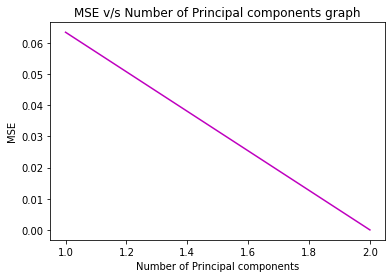

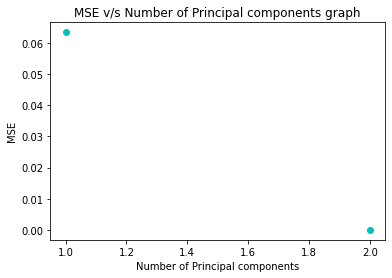

In [ ]:
d1 = 2
N1 = 5  
mean = np.random.rand(d1)
cov = make_spd_matrix(d1, random_state = 0)
matrix_gauss(d1, N1, mean, cov)

Example 2 

In [ ]:
d2 = 15 
N2 = 20 
mean = np.random.rand(d2)
cov = make_spd_matrix(d2, random_state = 0)
matrix_gauss(d2, N2, mean, cov)


Example 3 

In [ ]:
d3 = 20
N3 = 8 
mean = np.random.rand(d3)
cov = make_spd_matrix(d3, random_state = 0)
matrix_gauss(d3, N3, mean, cov)